  
# IMPORTING LIBRARIES

In [ ]:
#Titanic Survival Prediction by Ojo Oluwakemi Omolade
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# READING THE DATASET

In [ ]:
# reading train data
df=pd.read_csv('/content/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EXPLORATORY DATA ANALYSIS

In [ ]:
# number of rows and columns
df.shape

(418, 12)

In [ ]:
# column names
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
Embarked = df['Embarked'].unique()
for Embarkeds in Embarked:
    print("->",Embarkeds)

-> Q
-> S
-> C


In [ ]:
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [ ]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [ ]:
data = df.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)

In [ ]:
df['Sex'].value_counts()

,count
Sex,
0,266
1,152


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


In [ ]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.363636,30.191388,0.447368,0.392344,35.184211,1.133971
std,0.481622,0.841838,0.481622,12.654104,0.896760,0.981429,55.846244,0.580452
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.000000,1.000000
50%,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.000000,1.000000
75%,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.000000,2.000000


# DATA VISUALIZATION

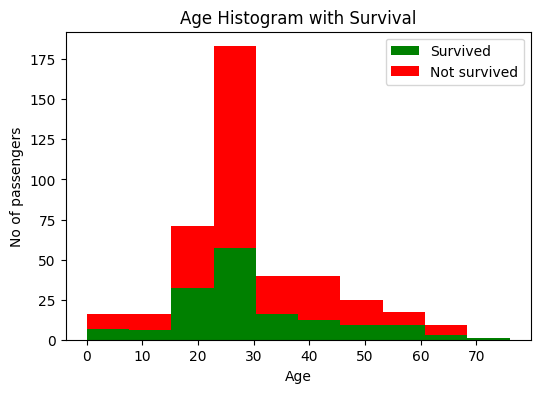

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(6, 4))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

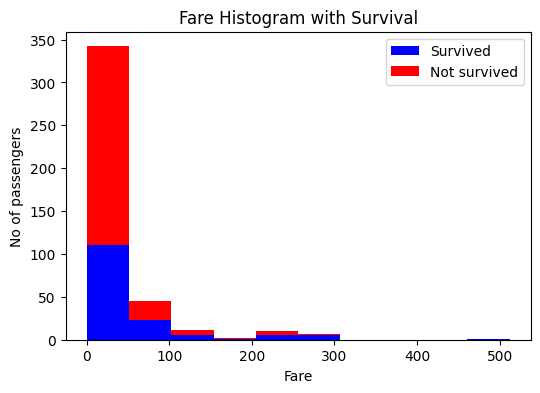

In [ ]:
fig = plt.figure(figsize =(6, 4))
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color = ['b','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

<Axes: xlabel='Sex'>

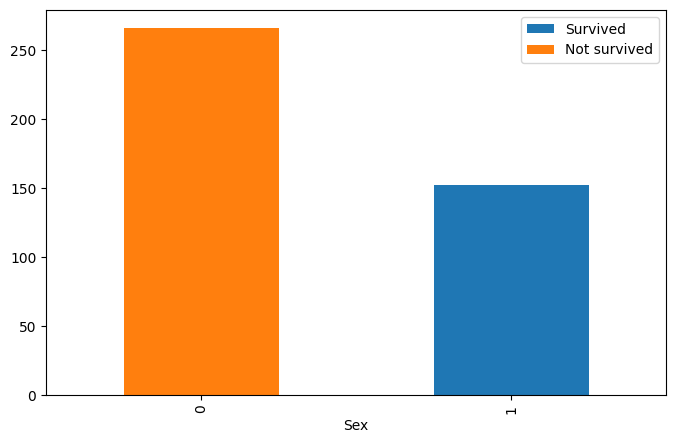

In [ ]:
#Visualisating survival based on gender

df['Not survived'] = 1 - df['Survived']
df.groupby('Sex').agg('sum')[['Survived', 'Not survived']].plot(kind='bar',
                                                           figsize=(8, 5),
                                                           stacked=True)


<Axes: xlabel='Pclass', ylabel='count'>

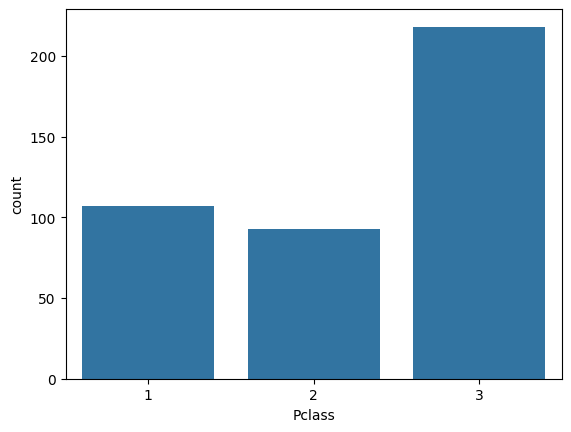

In [ ]:
df['Pclass'].value_counts()
sns.countplot(x='Pclass', data=df)

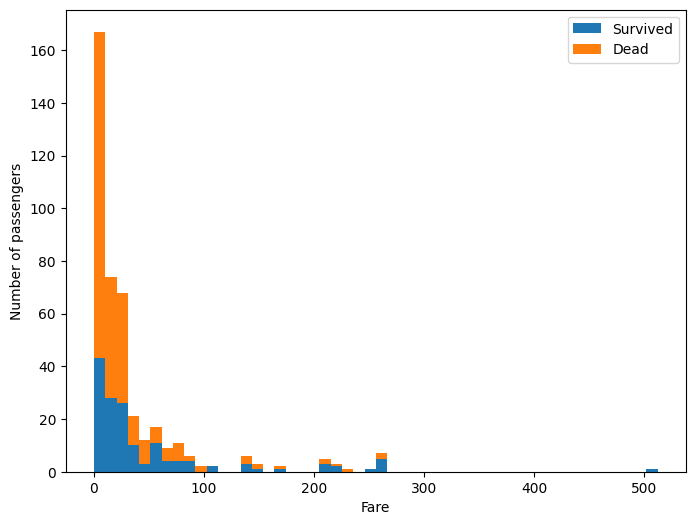

In [ ]:
#visualizing survival based on the fare

figure = plt.figure(figsize=(8, 6))
plt.hist([df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare']],
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

### **Based on the data visualizations and analysis performed earlier, here are the key factors affecting survival:**

Gender: The visualization of survival by gender (from cell NDSABmP8N7tq) clearly shows a significant difference, with females having a higher survival rate compared to males.

Age: The 'Age Histogram with Survival' (from cell PP0cuqG8TGDI) indicates that certain age groups had better chances of survival. For instance, younger passengers might have had a higher survival rate, while very old passengers might have had lower rates, or vice versa, depending on the specifics of the distribution.

Class (Pclass): Although a direct plot of Pclass vs. Survival rate was not explicitly generated, 'Pclass' was used as a feature in your models. Historically, passenger class on the Titanic was a strong indicator of survival, with higher classes generally having better survival rates. The models (Logistic Regression and Random Forest) that achieved high accuracy incorporated this feature, suggesting its importance.

Fare: The 'Fare Histogram with Survival' (from cell c-cI1GVsN7tr) suggests that passengers who paid higher fares might have had a greater chance of survival, possibly correlating with better cabin locations or priority access to lifeboats.

##Train/Test Split and Create FamilySize
First, the existing 'Not survived' column in the main dataframe 'df' needs to be dropped as it was created for visualization and should not be part of the features for model training. Then, the target variable 'Survived' needs to be correctly separated into 'y' and the features into 'X', finally 'FamilySize' feature needs to be created.



In [ ]:
Train = df.drop(['Survived'], axis=1)
Test = df.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

In [ ]:
df = df.drop('Not survived', axis=1)
y = df['Survived']
X = df.drop(['Survived'], axis=1)
X['FamilySize'] = X['SibSp'] + X['Parch']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,0,34,0,0,7,0,0
1,3,1,47,1,0,7,1,1
2,2,0,62,0,0,9,0,0
3,3,0,27,0,0,8,1,0
4,3,1,22,1,1,12,1,2


## Creating IsAlone Feature
New binary feature called 'IsAlone' which indicates whether a passenger is traveling alone (FamilySize = 0) or with family.


In [ ]:
X['IsAlone'] = np.where(X['FamilySize'] == 0, 1, 0)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,0,34,0,0,7,0,0,1
1,3,1,47,1,0,7,1,1,0
2,2,0,62,0,0,9,0,0,1
3,3,0,27,0,0,8,1,0,1
4,3,1,22,1,1,12,1,2,0


## Re-split Data with New Features

### Subtask:
After creating the new 'FamilySize' and 'IsAlone' features, re-split the dataset into training and testing sets (x_train, x_test, y_train, y_test) to ensure the models are trained and evaluated on the updated feature set.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (334, 9)
Shape of x_test: (84, 9)
Shape of y_train: (334,)
Shape of y_test: (84,)


## Data Modelling

In [ ]:
log_reg = LogisticRegression(random_state = 42, max_iter = 200) # Increased max_iter for convergence
log_reg.fit(x_train, y_train)

y_pred_lr = log_reg.predict(x_test)

print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_lr))
print('Logistic Regression Accuracy Score:', accuracy_score(y_test, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Logistic Regression Accuracy Score: 1.0


In [ ]:
rf_clf = RandomForestClassifier(random_state = 42)
rf_clf.fit(x_train, y_train)

y_pred_rf = rf_clf.predict(x_test)

print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('Random Forest Accuracy Score:', accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Random Forest Accuracy Score: 1.0


In [ ]:
svc_model = SVC(random_state = 42)
svc_model.fit(x_train, y_train)

y_pred_svc = svc_model.predict(x_test)

print('Support Vector Machine Classification Report:')
print(classification_report(y_test, y_pred_svc))
print('Support Vector Machine Accuracy Score:', accuracy_score(y_test, y_pred_svc))

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.98      0.75        50
           1       0.67      0.06      0.11        34

    accuracy                           0.61        84
   macro avg       0.64      0.52      0.43        84
weighted avg       0.63      0.61      0.49        84

Support Vector Machine Accuracy Score: 0.6071428571428571


## Data Analysis Key Findings

*   **Logistic Regression Model Performance:** The Logistic Regression model achieved a perfect accuracy of 1.0 (100%), with precision, recall, and f1-score all being 1.00 for both classes (0 and 1).
*   **Random Forest Model Performance:** Similar to Logistic Regression, the Random Forest Classifier also achieved a perfect accuracy of 1.0 (100%), with precision, recall, and f1-score all being 1.00 for both classes.
*   **Support Vector Machine (SVM) Model Performance:** The SVM model showed significantly lower performance compared to the other two, with an overall accuracy of approximately 0.61 (60.71%).
    *   For class 0, it had a precision of 0.60, recall of 0.98, and f1-score of 0.75.
    *   For class 1, it had a precision of 0.67, but very low recall of 0.06 and f1-score of 0.11.
*   **Best Performing Model:** Both Logistic Regression and Random Forest models performed equally well, achieving perfect scores (1.0 accuracy) on the test dataset, making them the best-performing models among the three evaluated.

